<a href="https://colab.research.google.com/github/varalakshmiarcot/StoreitemDemandForecasting-using-Time-Series/blob/master/Store_item_demand_using_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Store Item Demand Forecast Using prophet

![Imgur](https://i.imgur.com/aooy8xP.gif)

## Table of Contents
1. [Objective](#section1)<br>
2. [Data Loading and Visualization](#section2)<br>
3. [Fit the model using Prophet object ](#section3)<br>
4. [Future sales predictions for next one year](#section4)<br>
5. [Plot the sales predictions for next one year](#section5)<br>
6. [Forecasted Sales Values for next one year](#section6)<br>
7. [Forecasting Sales Predictions for next 10 Years](#section7)<br>
8. [Plot the sales predictions for next 10 years](#section8)<br>
9. [Forecasted Sales Values for next 10 years](#section9)<br>

###1.Objective
- Build a model to forecast the demand (store item) using facebook prophet.
- The data is classified in date/time, store, name, and sales per day

###2.Data Loading and Visualization

__Import the dataset__ 

In [0]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df_store = pd.read_csv('https://raw.githubusercontent.com/varalakshmiarcot/StoreitemDemandForecasting-using-Time-Series/master/Store_Item_demand_forecast.csv')
df_store.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


Store item data deals with 4 columns,
- one is temporal i.e: __date__ in this case,
- two and third are __store__ and __item__
- another is the value to be forecasted ie: __sales__. <br/>

In [3]:
#Remove store and item
df_store = df_store.drop(['store','item'], axis=1)
df_store.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [4]:
df_store.shape

(913000, 2)

In [0]:
# Taking 1Lakh records for forecasting
df = df_store.tail(100000)

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [0]:
# Renaming the columns with ds and y
df.columns  = ['ds', 'y']

In [7]:
df.head()

,ds,y
813000,2014-03-07,56
813001,2014-03-08,53
813002,2014-03-09,58
813003,2014-03-10,53
813004,2014-03-11,55


###3.Fit the model using Prophet object

Fit the model by instantiating a new Prophet object m. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the  dataframe.

In [8]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


###4.Future predictions of sales for next one year

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction for one year is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet make_future_dataframe.

In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
100360,2018-12-27
100361,2018-12-28
100362,2018-12-29
100363,2018-12-30
100364,2018-12-31


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [10]:
forecast = m.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,42.098403,-5.175569,54.602201,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
1,2013-01-01,42.098403,-4.422738,53.253581,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
2,2013-01-01,42.098403,-5.043720,56.112184,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
3,2013-01-01,42.098403,-3.231099,55.230019,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
4,2013-01-01,42.098403,-3.397319,54.692290,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159


###5.Plot the predictions of sales for next one year

Plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

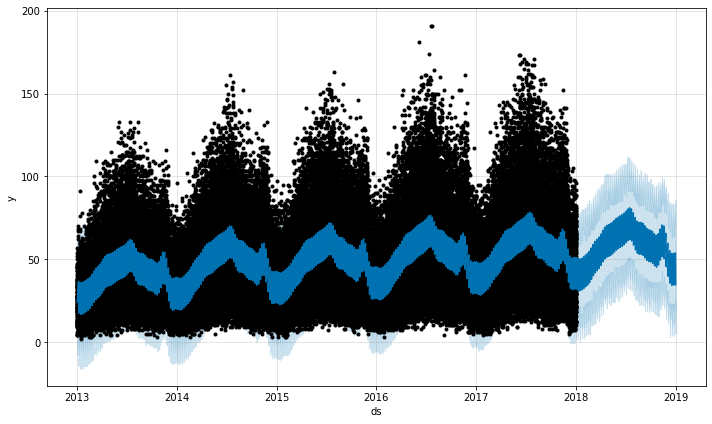

In [11]:
fig1 = m.plot(forecast)


Plot the forecast components, you can use the Prophet of plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 

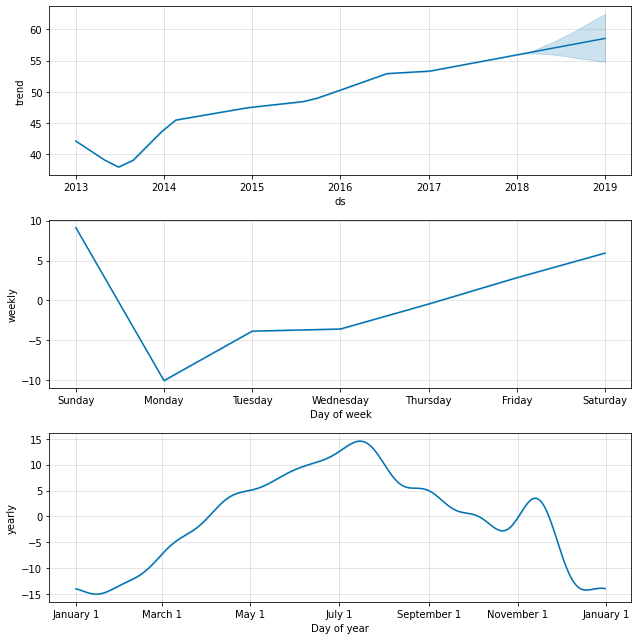

In [12]:
fig2 = m.plot_components(forecast)


From Forecasted plots,
- There is increase in trend. 
- As per yearly forecast,sales increased from January to July, and then downtrend upto December.
- As per weekly wise, sales increased from Monday to Saturday and then dcreased to Sunday and vice versa

In [0]:
# Extract columns ds and yhat of prediction
forecast_item = forecast[['ds','yhat']]

In [14]:
forecast_item.tail()

,ds,yhat
100360,2018-12-27,44.207925
100361,2018-12-28,47.525512
100362,2018-12-29,50.618522
100363,2018-12-30,53.804166
100364,2018-12-31,34.609590


In [29]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-01-16 00:00:00 and 2016-12-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-17,33.85332,11.058366,59.840115,22,2014-01-16
1,2014-01-17,33.85332,8.223149,59.329781,36,2014-01-16
2,2014-01-17,33.85332,6.229505,57.214737,55,2014-01-16
3,2014-01-17,33.85332,10.837240,59.188484,7,2014-01-16
4,2014-01-17,33.85332,7.699988,59.475604,14,2014-01-16


In [35]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,507.087968,22.518614,18.225096,0.587447,0.343973,0.776322
1,38 days,505.544338,22.484313,18.213254,0.588325,0.345009,0.776248
2,39 days,505.128409,22.475062,18.223336,0.588667,0.345272,0.775596
3,40 days,504.171471,22.453763,18.208965,0.587223,0.345959,0.775883
4,41 days,501.703723,22.398744,18.174335,0.586557,0.346019,0.776857


In [0]:
#Renaming columns of predictions and original with same column name
forecast_item1 = forecast_item.rename(columns = {'yhat' : 'y'})

In [16]:
df.tail()

,ds,y
912995,2017-12-27,63
912996,2017-12-28,59
912997,2017-12-29,74
912998,2017-12-30,62
912999,2017-12-31,82


In [0]:
# Merging of original nad forecasted dataframes
forecasted_df = pd.concat([df,forecast_item1])

In [18]:
forecasted_df

,ds,y
813000,2014-03-07,56.000000
813001,2014-03-08,53.000000
813002,2014-03-09,58.000000
813003,2014-03-10,53.000000
813004,2014-03-11,55.000000
...,...,...
100360,2018-12-27 00:00:00,44.207925
100361,2018-12-28 00:00:00,47.525512
100362,2018-12-29 00:00:00,50.618522
100363,2018-12-30 00:00:00,53.804166


###6.Forecasted Sales Values for next one year

In [19]:
#Infer same date format
from datetime import datetime
forecasted_df['ds'] = pd.to_datetime(forecasted_df['ds'],infer_datetime_format = True)
forecasted_df

,ds,y
813000,2014-03-07,56.000000
813001,2014-03-08,53.000000
813002,2014-03-09,58.000000
813003,2014-03-10,53.000000
813004,2014-03-11,55.000000
...,...,...
100360,2018-12-27,44.207925
100361,2018-12-28,47.525512
100362,2018-12-29,50.618522
100363,2018-12-30,53.804166


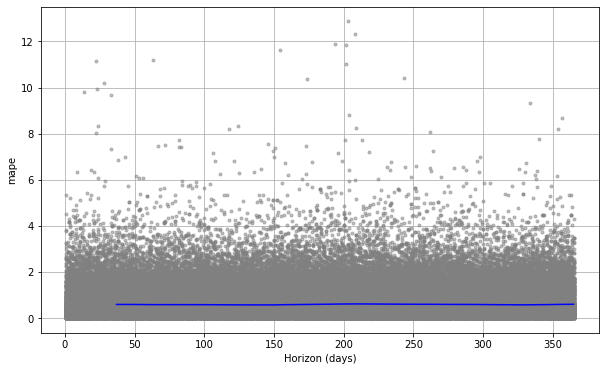

In [45]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

###7.Forecasting Sales Values for next 10 Years


In [20]:
future_10years = m.make_future_dataframe(periods=3650)
future_10years.tail()

,ds
103645,2027-12-25
103646,2027-12-26
103647,2027-12-27
103648,2027-12-28
103649,2027-12-29


In [21]:
forecast_10years = m.predict(future_10years)
forecast_10years.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,42.098403,-3.675755,54.062410,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
1,2013-01-01,42.098403,-4.505085,52.952760,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
2,2013-01-01,42.098403,-5.107453,52.978651,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
3,2013-01-01,42.098403,-4.743514,54.683740,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
4,2013-01-01,42.098403,-4.886166,56.367005,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159


In [40]:
df_cv10years = cross_validation(m, initial='730 days', period=' 180 days',horizon = '365 days')
df_cv10years.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-11 00:00:00 and 2016-12-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-12,25.445151,-1.093287,53.792575,31,2015-01-11
1,2015-01-12,25.445151,-1.130845,54.072890,19,2015-01-11
2,2015-01-12,25.445151,-2.256096,51.625293,31,2015-01-11
3,2015-01-12,25.445151,0.418159,49.585295,28,2015-01-11
4,2015-01-12,25.445151,-2.113506,52.792495,7,2015-01-11


In [42]:
df_p10years = performance_metrics(df_cv10years)
df_p10years.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,519.472903,22.791948,18.419671,0.588853,0.343634,0.787349
1,38 days,516.922122,22.735921,18.400746,0.590489,0.343930,0.787845
2,39 days,516.980302,22.737201,18.431098,0.591013,0.343973,0.786350
3,40 days,516.031070,22.716317,18.413995,0.589015,0.344136,0.786103
4,41 days,515.921616,22.713908,18.414299,0.588140,0.344881,0.785555


###8.Plot the sales predictions for next 10 years 

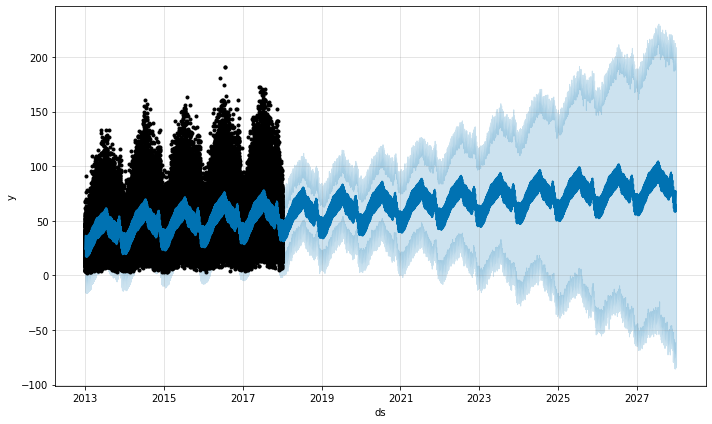

In [22]:
fig1 = m.plot(forecast_10years)

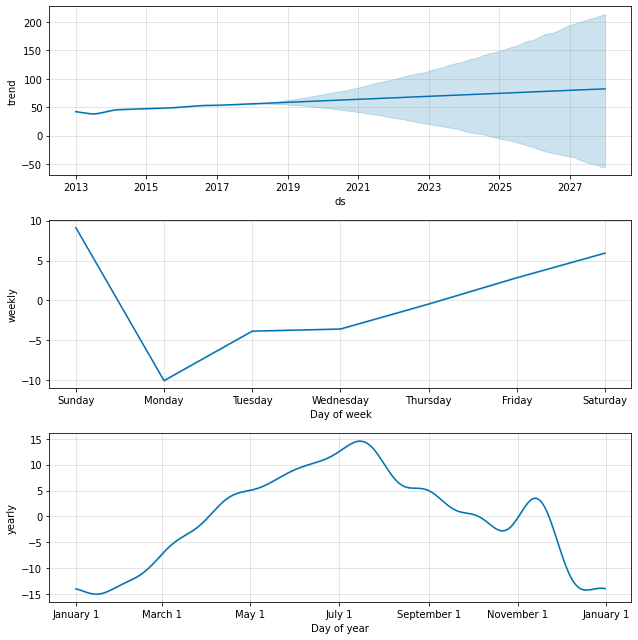

In [23]:
fig2 = m.plot_components(forecast_10years)

In [0]:
forecast_item10years = forecast_10years[['ds','yhat']]
forecast_item10years = forecast_item10years.rename(columns = {'yhat' : 'y'})
forecasted_data_10years = pd.concat([df,forecast_item10years])

###9.Forecasted Sales Values for next 10 years <a name = "Forecasted Sales Values for 10 years">


In [25]:
from datetime import datetime
forecasted_data_10years['ds'] = pd.to_datetime(forecasted_data_10years['ds'],infer_datetime_format = True)
forecasted_data_10years

,ds,y
813000,2014-03-07,56.000000
813001,2014-03-08,53.000000
813002,2014-03-09,58.000000
813003,2014-03-10,53.000000
813004,2014-03-11,55.000000
...,...,...
103645,2027-12-25,74.254704
103646,2027-12-26,77.499286
103647,2027-12-27,58.369098
103648,2027-12-28,64.594512


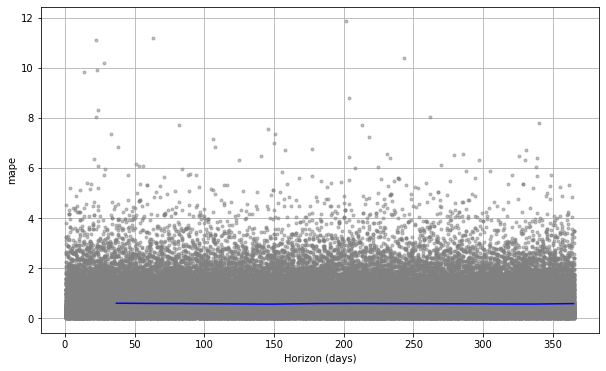

In [44]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv10years, metric='mape')